<a href="https://colab.research.google.com/github/Jang-Uk-5362/data-science/blob/ML-Supervised-Learning-Classification/ML_Unsuperviesd_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K - Means

각 데이터를 K개의 클러스터(그룹)로 군집화하는 알고리즘

각 데이터로부터  이들이 속한 클러스터의 중심점까지 평균 거리를 계산 , 중심점 : Centriod

**K - means 동작순서**

1, K값 설정

2, 지정된 K개 만큼의 중심점 랜덤좌표 설정

3, 모든 데이터로부터 가장 가까운 중심점 선택

4, 데이터들의 평균 중심으로 중심점 이동

5, 중심점이 더 이상 이동되지 않을 때까지 반복

=> 랜덤 좌표 설정에서 Random Initialization Trap 문제 발생

**K - Mans++ 동작순서**

1, 데이터 중에서 랜덤으로 1개 중심점으로 선택

2, 나머지 데이터로부터 중심점까지의 거리 계산

3, 중심점과 가장 먼 지점의 데이터를 다음 중심점으로 선택

4, 중심점이 K 개가 될때까지 반복

5, K-Means 전통적인 방식으로 진행

**Elbow Method - optimal K**

1, K변화에 따른 중심점까지의 평균 거리 비교

2,경시가 완만해지는 지점의 K 선정 : Elbow point


**Euclidena Distance**

d = root((x2 - x1)^2 + (y2-y1)^2)


.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("KMeansData.csv")
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [5]:
X = dataset.iloc[:,:].values
#X = dataset.values
X[:5]


array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

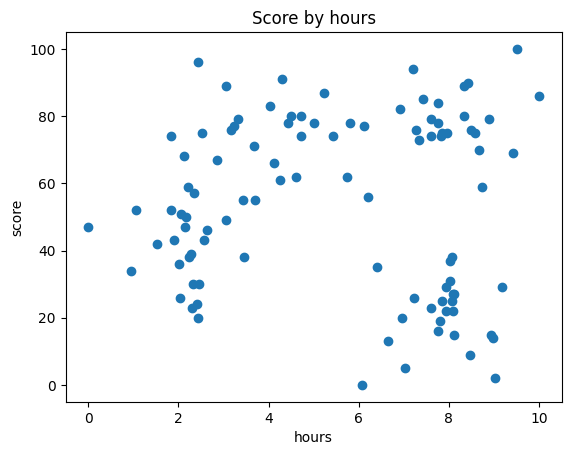

In [6]:
# 데이터 시각화 (전제 데이터 분포)
plt.scatter(X[:,0],X[:,1]) # x축 : hours ,y축 : score
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()


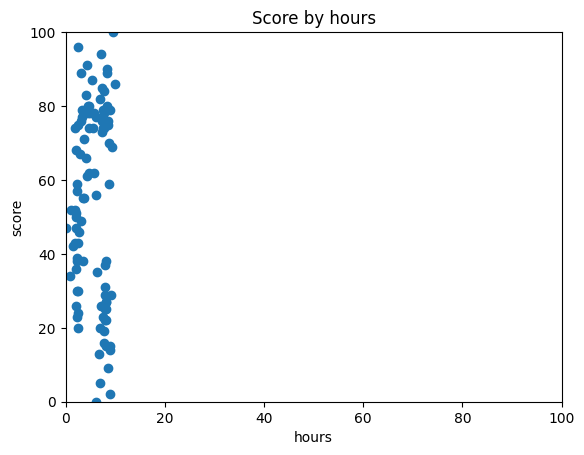

In [7]:
# 데이터 시각화 (축범위 통일)
plt.scatter(X[:,0],X[:,1]) # x축 : hours ,y축 : score
plt.title("Score by hours")
plt.xlabel("hours")
plt.xlim(0,100)
plt.ylabel("score")
plt.ylim(0,100)
plt.show()

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

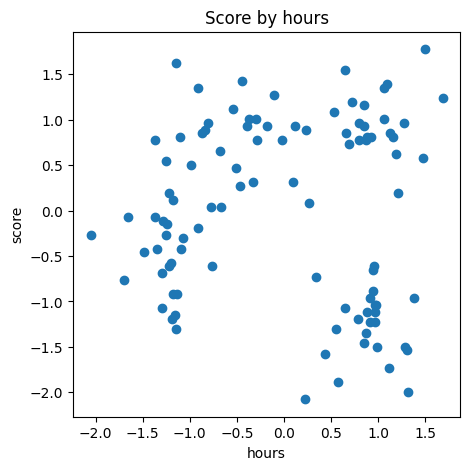

In [9]:
# 데이터 시각화 (스케일링된 데이터)
plt.figure(figsize=(5,5))
plt.scatter(X_sc[:,0],X_sc[:,1])
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

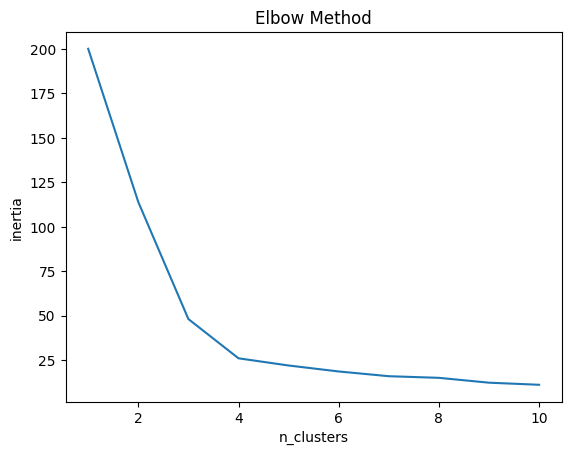

In [10]:
# Find the optimal K (Elbow Method)
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
  kmeans  = KMeans(n_clusters = i,init='k-means++',random_state = 0)
  kmeans.fit(X_sc)
  inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심까지의 거리 제곱의 합

# 데이터 시각화
plt.plot(range(1,11),inertia_list)
plt.title("Elbow Method")
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [11]:
centers = kmeans.cluster_centers_ # cluster의 중심점(centroid) 좌표
centers

array([[-1.20793168, -0.89304353],
       [ 0.94645428,  0.84024903],
       [ 0.87621016, -1.02940243],
       [-0.99756207,  0.89717589],
       [-0.20879507,  1.00503731],
       [ 1.14180775, -1.62087466],
       [-0.34035502,  0.21808919],
       [ 1.19754583,  1.45959615],
       [-1.32122855, -0.18617948],
       [ 0.40798532, -1.84558595]])

In [12]:
# optimal K으로 K-Means 학습
K = 4 #n_clusters = 4
kmeans = KMeans(n_clusters=K,random_state = 0)
y_kmeans = kmeans.fit_predict(X_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

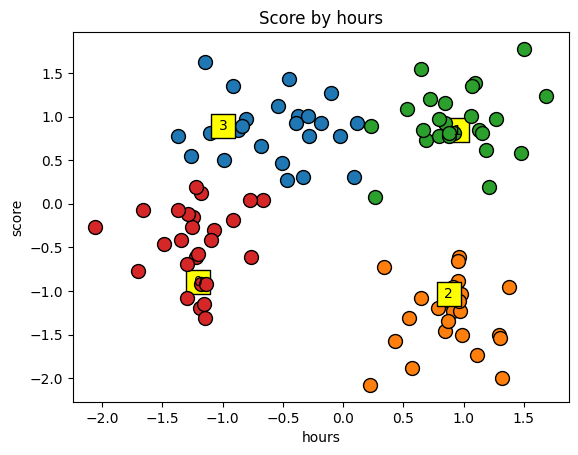

In [14]:
# 데이터 시각화 (optimal K)
for cluster in range(K):
  plt.scatter(centers[cluster,0],centers[cluster,1], s = 300, edgecolors= 'black',color = 'yellow',marker='s')
  plt.scatter(X_sc[y_kmeans == cluster,0],X_sc[y_kmeans == cluster,1],s = 100,edgecolors= 'black')
  plt.text(centers[cluster,0],centers[cluster,1],cluster,va = 'center',ha = 'center')

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [15]:
#데이터 시각화(스케일링 원복)
X_org = sc.inverse_transform(X_sc) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [16]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 2.26363636, 30.72727273],
       [ 8.02277778, 75.72222222],
       [ 7.835     , 27.1875    ],
       [ 2.826     , 77.2       ],
       [ 4.93454545, 80.        ],
       [ 8.545     , 11.83333333],
       [ 4.58285714, 59.57142857],
       [ 8.694     , 91.8       ],
       [ 1.96076923, 49.07692308],
       [ 6.58333333,  6.        ]])

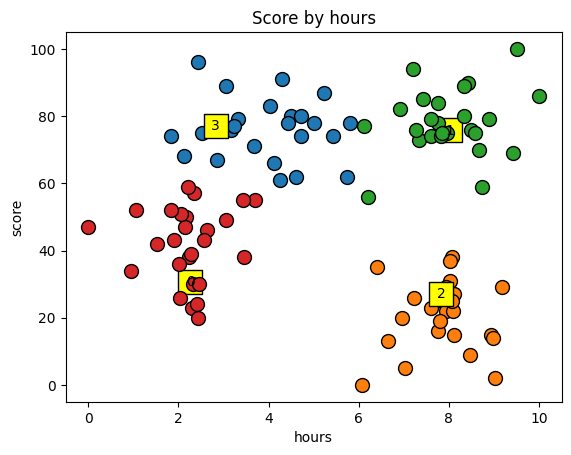

In [17]:
# 데이터 시각화(원본된 데이터)
# 데이터 시각화 (optimal K)
for cluster in range(K):
  plt.scatter(centers_org[cluster,0],centers_org[cluster,1], s = 300, edgecolors= 'black',color = 'yellow',marker='s')
  plt.scatter(X_org[y_kmeans == cluster,0],X_org[y_kmeans == cluster,1],s = 100,edgecolors= 'black')
  plt.text(centers_org[cluster,0],centers_org[cluster,1],cluster,va = 'center',ha = 'center')

plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### Insight

0번 Cluster(blue) : 공부시간은 적은데 점수가 높게 나오는 학생들 -> 효율적으로 공부를 잘 진행중이다.

1번 Cluster(Orange) : 공부시간은 많은데 점수가 잘 안나오는 학생들 -> 공부 방식에 대한 피드백 진행 혹은 앉아만 있고 집중력이 떨어진다고 판단해 적절한 관리감독이 필요하다

2번 Cluster(Green) : 공부시간도 많고 점수도 잘 나오는 학생들 -> 정직하고 성실한 학생들이다. 조금 더 효울적인 공부방식에 대한 피드백을 진행

3번 Cluster(Red) : 공부시간도 적고 점수고 안나오는 학생들 -> 학생 개개인에 맞춰 엄격한 관리감독하에 지도가 필요하다.